# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [16]:
def apply_svd_custom(X_train, X_test, n_components):
    # Center the data by subtracting the mean of each feature
    X_mean = np.mean(X_train, axis=0)
    X_train_centered = X_train - X_mean
    X_test_centered = X_test - X_mean

    # Compute the covariance matrix
    covariance_matrix = np.dot(X_train_centered.T, X_train_centered) / X_train_centered.shape[0]

    # Compute eigenvalues and eigenvectors of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    # Sort the eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvectors = eigenvectors[:, sorted_indices]
    eigenvalues = eigenvalues[sorted_indices]

    # Select the top n_components eigenvectors (principal components)
    eigenvectors = eigenvectors[:, :n_components]

    # Project the data onto the top n_components eigenvectors
    X_train_reduced = np.dot(X_train_centered, eigenvectors)
    X_test_reduced = np.dot(X_test_centered, eigenvectors)

    return X_train_reduced, X_test_reduced, eigenvectors

## Part 3: Train Logistic Regression and Measure Performance

In [17]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')

    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [18]:
svd_components = [10, 20, 50, 70, 100]  # You need to decide what number to search...

# Store the results
results = []

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")

    # Apply SVD to the training and test sets
    # Call apply_svd_custom() here...
    X_train_svd, X_test_svd, singular_vectors = apply_svd_custom(X_train, X_test, n_components)

    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)

    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")

    results.append((n_components, accuracy, training_time))


Training models with different levels of SVD preprocessing...
Applying custom SVD with 10 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 10, Accuracy: 0.8035, Training time: 1.0940 seconds
Applying custom SVD with 20 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 20, Accuracy: 0.8784, Training time: 3.8141 seconds
Applying custom SVD with 50 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 50, Accuracy: 0.9080, Training time: 12.9992 seconds
Applying custom SVD with 70 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 70, Accuracy: 0.9147, Training time: 18.7190 seconds
Applying custom SVD with 100 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 100, Accuracy: 0.9181, Training time: 43.3988 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


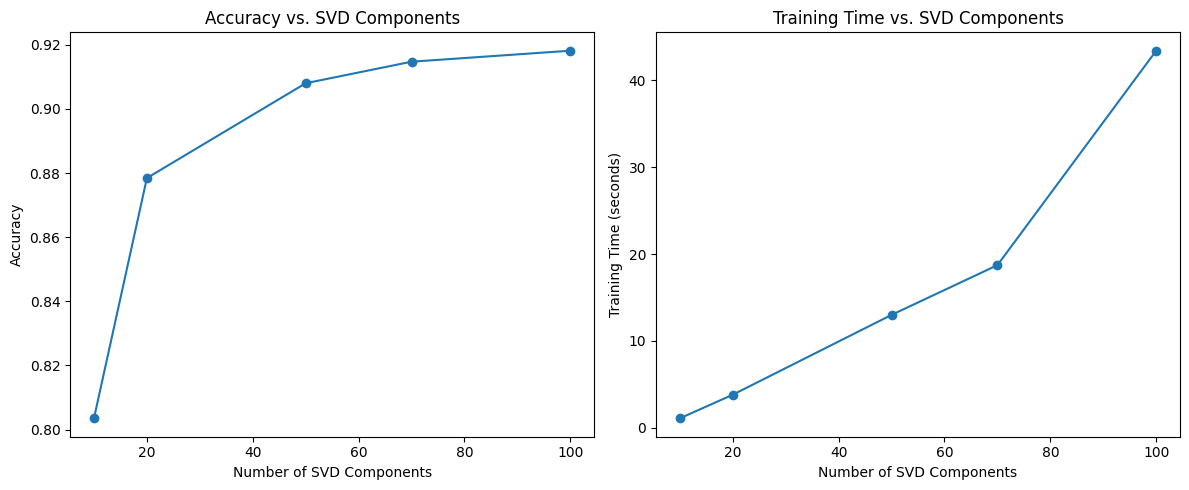

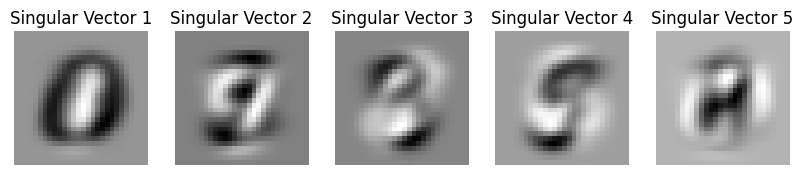

In [19]:
## Your implementation here...
## You may add necessary lines in Part 4 to access data for visualization
## Plot accuracy and training time vs. SVD components
components, accuracies, times = zip(*results)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(components, accuracies, marker='o')
plt.title('Accuracy vs. SVD Components')
plt.xlabel('Number of SVD Components')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(components, times, marker='o')
plt.title('Training Time vs. SVD Components')
plt.xlabel('Number of SVD Components')
plt.ylabel('Training Time (seconds)')

plt.tight_layout()
plt.show()

# Visualize top 5 singular vectors
plt.figure(figsize=(10, 5))
for i in range(5):
    singular_image = singular_vectors[:, i].reshape(28, 28)
    plt.subplot(1, 5, i + 1)
    plt.imshow(singular_image, cmap='gray')
    plt.axis('off')
    plt.title(f"Singular Vector {i+1}")

plt.show()

## Part 6: Analyze / Conclusion

YOUR ANSWER: The plot shows that as you increase the number of SVD components, the accuracy improves and starts to plateau after 50 components at around 0.9. The increase in accuracy from 50 to 100 components is minimal. Therefore, it shows that using more than 50 components may not provide a significant performance improvement.

The training time increases almost linearly with the number of SVD components.
For example, with 20 components, training time is minimal, while at 100 components, the training time is around 40 seconds. Although accuracy continues to slightly improve with more components, the training time increases significantly, making it inefficient.

The visualized singular vectors in the second image represent the top 5 principal components of the dataset. Singular vectors 1 and 2 appear to capture dominant features (outlines) of the digits (0, 7, 2, 3, and 9). As you move to higher singular vectors, the digits become less distinct and more focused on details.

Optimal Components: 50 seems to be the sweet spot, balancing accuracy and time efficiency.

Singular Vectors: The first few singular vectors capture the most essential features of the digits. We should stop at 50 components to avoid over-complicating the model with longer training times.
